In [1]:
import pandas as pd
from textblob import TextBlob
import csv
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
import os
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
n = 1727
t = 'Odyssey'
s = 2

In [4]:
novel = strip_headers(load_etext(n))
novel = novel.replace('\n', ' ')
novel= TextBlob(novel)
novel_sentences = novel.sentences
novel_title = t

In [19]:
for l in range(2):
    novelWriter = csv.writer(open('novel_'+novel_title+'3.csv', 'w'), delimiter=',')
    for sentence in novel_sentences:
        novelWriter.writerow([sentence])

In [5]:
df_novel = pd.read_csv('novel_'+novel_title+'3.csv', skiprows = s, header=None)

In [6]:
df_novel.head()

,0
0,I shall not here argue the two main points dea...
1,"The points in question are: (1) that the ""Ody..."
2,(2) That the poem was entirely written by a ve...
3,The main arguments on which I base the first o...
4,Both contentions were urged (also without rejo...


In [67]:
len(df_novel)

4492

In [7]:
wrd_length = []
total_char = []
def wrd_char_counts(sentence):
    total_chars = 0
    wrd_counts = []
    for word in sentence:
        char_count = len(word)
        wrd_counts.append(char_count)
        total_chars += char_count
    total_char.append(total_chars)
    wrd_length.append(wrd_counts)

In [8]:
for l in df_novel[0]:
    sent = TextBlob(l)
    wrd_char_counts(sent.words)

In [9]:
df_novel['wrd_length'] = wrd_length
df_novel['total_char'] = total_char

In [10]:
df_novel.head()

,0,wrd_length,total_char
0,I shall not here argue the two main points dea...,"[1, 5, 3, 4, 5, 3, 3, 4, 6, 5, 4, 2, 3, 4, 4, ...",127
1,"The points in question are: (1) that the ""Ody...","[3, 6, 2, 8, 3, 1, 4, 3, 7, 3, 7, 8, 2, 3, 5, ...",363
2,(2) That the poem was entirely written by a ve...,"[1, 4, 3, 4, 3, 8, 7, 2, 1, 4, 5, 5, 3, 5, 2, ...",134
3,The main arguments on which I base the first o...,"[3, 4, 9, 2, 5, 1, 4, 3, 5, 2, 5, 8, 9, 11, 4,...",215
4,Both contentions were urged (also without rejo...,"[4, 11, 4, 5, 4, 7, 9, 2, 3, 7, 5, 3, 3, 4, 3,...",99


In [11]:
def CountSyllables(word, isName=True):
    vowels = "aeiouy"
    #single syllables in words like bread and lead, but split in names like Breanne and Adreann
    specials = ["ia","ea"] if isName else ["ia"]
    specials_except_end = ["ie","ya","es","ed"]  #seperate syllables unless ending the word
    currentWord = word.lower()
    numVowels = 0
    lastWasVowel = False
    last_letter = ""

    for letter in currentWord:
        if letter in vowels:
            #don't count diphthongs unless special cases
            combo = last_letter+letter
            if lastWasVowel and combo not in specials and combo not in specials_except_end:
                lastWasVowel = True
            else:
                numVowels += 1
                lastWasVowel = True
        else:
            lastWasVowel = False

        last_letter = letter

    #remove es & ed which are usually silent
    if len(currentWord) > 2 and currentWord[-2:] in specials_except_end:
        numVowels -= 1

    #remove silent single e, but not ee since it counted it before and we should be correct
    elif len(currentWord) > 2 and currentWord[-1:] == "e" and currentWord[-2:] != "ee" and currentWord != 'the':
        numVowels -= 1

    return numVowels

In [12]:
syl = []
for l in df_novel[0]:
    sent = TextBlob(l)
    syl_single = []
    for x in sent.words:
        m = CountSyllables(x)
        syl_single.append(m)
    syl.append(syl_single)    

In [13]:
syl_count_arr = []
for n in syl:
    n = np.array(n)
    syl_count_arr.append(n)

In [14]:
df_novel['syl_count'] = syl_count_arr

In [15]:
df_novel.head()

,0,wrd_length,total_char,syl_count
0,I shall not here argue the two main points dea...,"[1, 5, 3, 4, 5, 3, 3, 4, 6, 5, 4, 2, 3, 4, 4, ...",127,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ..."
1,"The points in question are: (1) that the ""Ody...","[3, 6, 2, 8, 3, 1, 4, 3, 7, 3, 7, 8, 2, 3, 5, ...",363,"[1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 2, 4, 1, 1, 1, ..."
2,(2) That the poem was entirely written by a ve...,"[1, 4, 3, 4, 3, 8, 7, 2, 1, 4, 5, 5, 3, 5, 2, ...",134,"[0, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 2, 1, 1, 1, ..."
3,The main arguments on which I base the first o...,"[3, 4, 9, 2, 5, 1, 4, 3, 5, 2, 5, 8, 9, 11, 4,...",215,"[1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, ..."
4,Both contentions were urged (also without rejo...,"[4, 11, 4, 5, 4, 7, 9, 2, 3, 7, 5, 3, 3, 4, 3,...",99,"[1, 3, 1, 1, 2, 2, 3, 1, 1, 3, 2, 1, 1, 1, 1, ..."


In [16]:
syl_sum = []
for l in range(0,len(df_novel)):
    syl_sum.append(df_novel['syl_count'][l].sum())

In [17]:
df_novel['syl_sum'] = syl_sum

In [18]:
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [81]:
df_novel['sentiment'] = df_novel[0].apply(detect_sentiment)

In [83]:
df2 = df_novel[df_novel['total_char']<=3]
df2

,0,wrd_length,total_char,syl_count,syl_sum,sentiment
3928,"""Od.""",[2],2,[1],1,0.0
3929,iii.,[3],3,[1],1,0.0
3933,ii.,[2],2,[1],1,0.0
3936,i.,[1],1,[1],1,0.0
3937,365.,[3],3,[0],0,0.0
3942,"""Il.""",[2],2,[1],1,0.0
3943,vi.,[2],2,[1],1,0.0
3966,416.,[3],3,[0],0,0.0
3971,"""Il.""",[2],2,[1],1,0.0
3972,ii.,[2],2,[1],1,0.0


In [84]:
df = df_novel[df_novel['total_char']>3]

In [89]:
df.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment
0,I shall not here argue the two main points dea...,"[1, 5, 3, 4, 5, 3, 3, 4, 6, 5, 4, 2, 3, 4, 4, ...",127,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...",38,0.166667
1,"The points in question are: (1) that the ""Ody...","[3, 6, 2, 8, 3, 1, 4, 3, 7, 3, 7, 8, 2, 3, 5, ...",363,"[1, 1, 1, 2, 1, 0, 1, 1, 3, 1, 2, 4, 1, 1, 1, ...",129,-0.063333
2,(2) That the poem was entirely written by a ve...,"[1, 4, 3, 4, 3, 8, 7, 2, 1, 4, 5, 5, 3, 5, 2, ...",134,"[0, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1, 2, 1, 1, 1, ...",45,0.065000
3,The main arguments on which I base the first o...,"[3, 4, 9, 2, 5, 1, 4, 3, 5, 2, 5, 8, 9, 11, 4,...",215,"[1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, ...",70,-0.047917
4,Both contentions were urged (also without rejo...,"[4, 11, 4, 5, 4, 7, 9, 2, 3, 7, 5, 3, 3, 4, 3,...",99,"[1, 3, 1, 1, 2, 2, 3, 1, 1, 3, 2, 1, 1, 1, 1, ...",33,0.000000


In [88]:
df_cluster = df.drop('wrd_length', 1)

In [90]:
df_cluster = df_cluster.drop('syl_count', 1)

In [91]:
df_cluster.head()

,0,total_char,syl_sum,sentiment
0,I shall not here argue the two main points dea...,127,38,0.166667
1,"The points in question are: (1) that the ""Ody...",363,129,-0.063333
2,(2) That the poem was entirely written by a ve...,134,45,0.065000
3,The main arguments on which I base the first o...,215,70,-0.047917
4,Both contentions were urged (also without rejo...,99,33,0.000000


In [92]:
X = df_cluster.drop(0, axis=1)

In [93]:
from sklearn.cluster import KMeans

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
km = KMeans(n_clusters=20, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [96]:
km.labels_

array([ 7, 12,  0, ..., 18,  1, 13], dtype=int32)

In [97]:
df_cluster['cluster'] = km.labels_

In [98]:
df_cluster.head()

,0,total_char,syl_sum,sentiment,cluster
0,I shall not here argue the two main points dea...,127,38,0.166667,7
1,"The points in question are: (1) that the ""Ody...",363,129,-0.063333,12
2,(2) That the poem was entirely written by a ve...,134,45,0.065000,0
3,The main arguments on which I base the first o...,215,70,-0.047917,17
4,Both contentions were urged (also without rejo...,99,33,0.000000,7


In [99]:
df_cluster.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,155.027248,49.190736,-0.028369
1,17.785185,5.229630,-0.002011
2,101.037288,32.216949,0.286146
3,282.807692,90.471154,0.281708
4,169.542857,54.000000,-0.447589
5,212.071823,67.265193,0.352047
6,81.513889,26.277778,0.896412
7,113.460280,36.037383,0.019100
8,266.247788,84.752212,-0.046537


In [100]:
centers = df_cluster.groupby('cluster').mean()

In [101]:
colors = np.array(['#999999', '#0000ff', '#4d4d4d', '#0000b2', '#8833ff', '#333333', '#4412b2', '#808080', '#33a3ff', '#124cb2', '#666666', '#39b54a','#21682b', '#64c1b5', '#2b6855', '#91c164', '#40682b', '#3fa9f5', '#7cc3f5','#badcf5'])

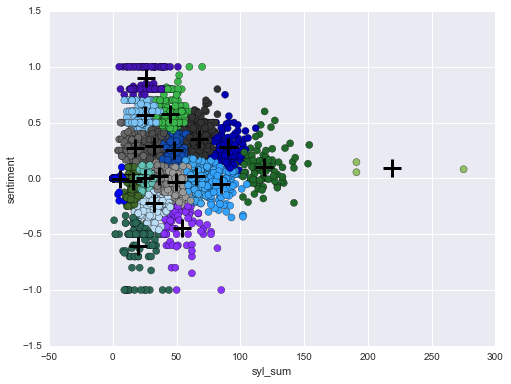

In [102]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df_cluster.syl_sum, df_cluster.sentiment, c=colors[df_cluster.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.syl_sum, centers.sentiment, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('syl_sum')
plt.ylabel('sentiment')

In [103]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.34779959051897741

In [106]:
k_range = range(2,20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

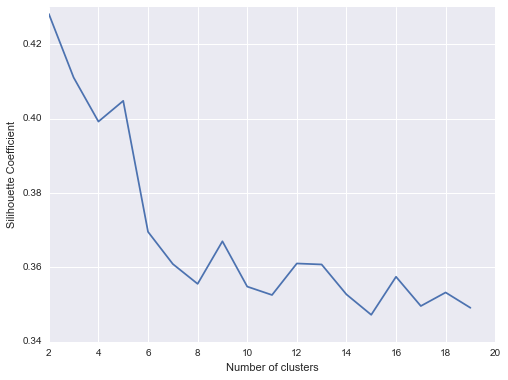

In [107]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silihouette Coefficient')
plt.grid(True)

In [108]:
k_range = range(2,150)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

KeyboardInterrupt: 

In [109]:
df_novel['total_char'].sum()

527509

In [110]:
ratio = (df_novel['total_char'].sum()/20) - 50

In [111]:
ratio

26325

In [112]:
t = 0
x = 0
ratio = (df_novel['total_char'].sum()/20) - 100
def find_this(t, x):
    w = 0    
    sent_stop = []
    while w <= ratio:
        w = df_novel['total_char'][t:x].sum()
        sent_stop.append(x)
        x += 1
    return max(sent_stop)     

In [113]:
t = 0
x = 0
start_point = []
stop_point = []
for n in range(1, 21):
    s = find_this(t, x)
    print "df_novel['total_char'][%s:%s]" %(t, s)
    start_point.append(t)
    stop_point.append(s)
    t = s
    x = s + 1      

df_novel['total_char'][0:196]
df_novel['total_char'][196:409]
df_novel['total_char'][409:633]
df_novel['total_char'][633:847]
df_novel['total_char'][847:1062]
df_novel['total_char'][1062:1262]
df_novel['total_char'][1262:1463]
df_novel['total_char'][1463:1667]
df_novel['total_char'][1667:1863]
df_novel['total_char'][1863:2056]
df_novel['total_char'][2056:2248]
df_novel['total_char'][2248:2473]
df_novel['total_char'][2473:2708]
df_novel['total_char'][2708:2934]
df_novel['total_char'][2934:3142]
df_novel['total_char'][3142:3346]
df_novel['total_char'][3346:3572]
df_novel['total_char'][3572:3789]
df_novel['total_char'][3789:4120]
df_novel['total_char'][4120:4489]


In [114]:
df_novel.tail()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment
4487,{186} So practised a washerwoman as our author...,"[3, 2, 9, 1, 11, 2, 3, 9, 9, 4, 4, 2, 4, 4, 3,...",365,"[0, 1, 2, 1, 4, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, ...",115,-0.016667
4488,{187} We must suppose Dolius not yet to know t...,"[3, 2, 4, 7, 6, 3, 3, 2, 4, 4, 3, 3, 10, 3, 4,...",161,"[0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, ...",49,0.000000
4489,Dolius was probably exceptionally simple-minde...,"[6, 3, 8, 13, 13, 3, 3, 4, 3, 8]",64,"[2, 1, 3, 5, 3, 1, 1, 1, 1, 4]",22,0.666667
4490,So on Mt.,"[2, 2, 2]",6,"[1, 1, 0]",2,0.000000
4491,Eryx I was shown a man who was always called S...,"[4, 1, 3, 5, 1, 3, 3, 3, 6, 6, 5, 7, 2, 9, 2, ...",89,"[2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 4, 1, 3, 1, ...",32,0.000000


In [115]:
twenty_piece_char = []
st = 0
for l in start_point: 
    strt = start_point[st]
    stp = stop_point[st]
    print strt
    print stp
    mn = df_novel['sentiment'][strt:stp].mean()
    twenty_piece_char.append(mn)
    print mn
    st +=1   

0
196
0.121420226366
196
409
0.117087487043
409
633
0.109795536291
633
847
0.0825874544286
847
1062
0.107138453141
1062
1262
0.143915269962
1262
1463
0.140280697467
1463
1667
0.0809287766745
1667
1863
0.112120633138
1863
2056
0.0654537466228
2056
2248
0.13838209049
2248
2473
0.136372190875
2473
2708
0.105312800625
2708
2934
0.0932460522311
2934
3142
0.120243288251
3142
3346
0.10278132002
3346
3572
0.0778769402304
3572
3789
0.0901873979409
3789
4120
0.0593384579572
4120
4489
0.0217041556506


In [116]:
n = np.array(n)
twenty_piece_char = np.array(twenty_piece_char)
print twenty_piece_char

[ 0.12142023  0.11708749  0.10979554  0.08258745  0.10713845  0.14391527
  0.1402807   0.08092878  0.11212063  0.06545375  0.13838209  0.13637219
  0.1053128   0.09324605  0.12024329  0.10278132  0.07787694  0.0901874
  0.05933846  0.02170416]


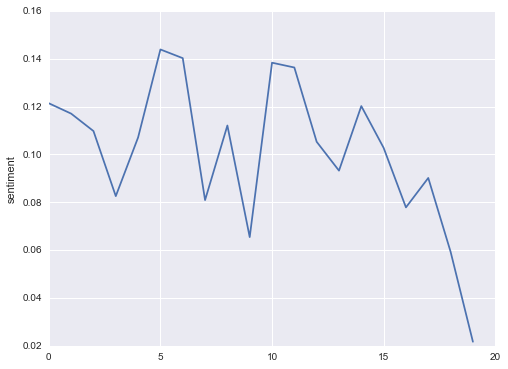

In [117]:
plt.plot(twenty_piece_char)
plt.ylabel('sentiment')
plt.show()

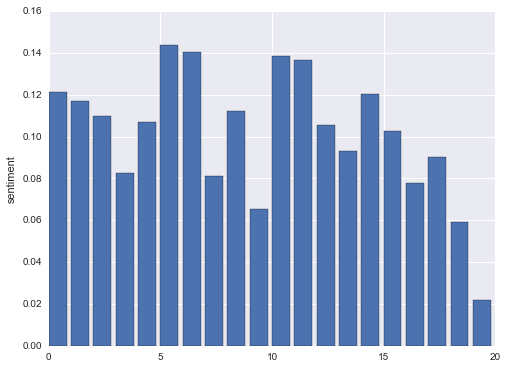

In [118]:
plt.bar(range(20), twenty_piece_char)
plt.ylabel('sentiment')
plt.show()